In [32]:
import pandas as pd

df = pd.read_csv('student_habits_performance.csv')

In [33]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [34]:
df.dropna(inplace=True)

In [35]:
df.isna().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [36]:
df.duplicated().sum()

np.int64(0)

In [37]:
df.drop(['student_id'], axis=1, inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            909 non-null    int64  
 1   gender                         909 non-null    object 
 2   study_hours_per_day            909 non-null    float64
 3   social_media_hours             909 non-null    float64
 4   netflix_hours                  909 non-null    float64
 5   part_time_job                  909 non-null    object 
 6   attendance_percentage          909 non-null    float64
 7   sleep_hours                    909 non-null    float64
 8   diet_quality                   909 non-null    object 
 9   exercise_frequency             909 non-null    int64  
 10  parental_education_level       909 non-null    object 
 11  internet_quality               909 non-null    object 
 12  mental_health_rating           909 non-null    int64  


In [39]:
df.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [44]:
categorical_cols = df.describe(include='object').columns.to_numpy()

In [45]:
categorical_cols

array(['gender', 'part_time_job', 'diet_quality',
       'parental_education_level', 'internet_quality',
       'extracurricular_participation'], dtype=object)

In [46]:
for col in categorical_cols:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in gender: ['Female' 'Male' 'Other']
Unique values in part_time_job: ['No' 'Yes']
Unique values in diet_quality: ['Fair' 'Good' 'Poor']
Unique values in parental_education_level: ['Master' 'High School' 'Bachelor']
Unique values in internet_quality: ['Average' 'Poor' 'Good']
Unique values in extracurricular_participation: ['Yes' 'No']


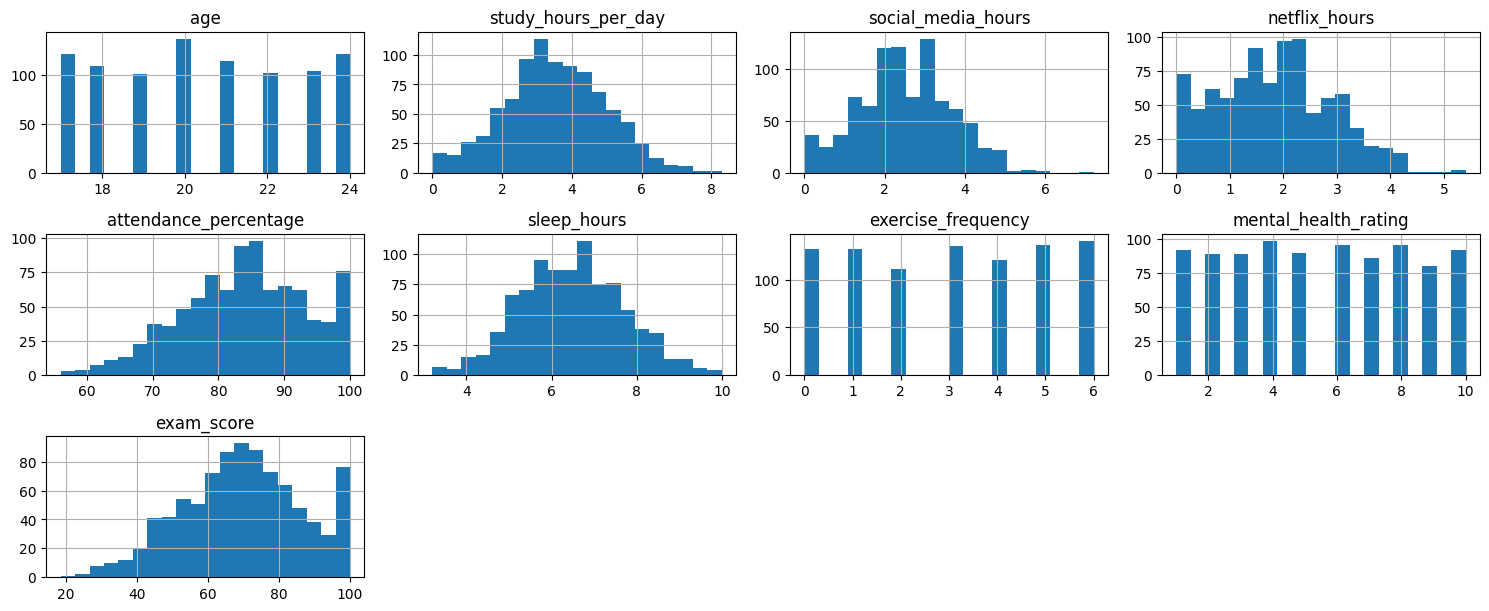

In [52]:
import matplotlib.pyplot as plt
df.hist(figsize=(15, 8), bins=20, layout=(4, 4))
plt.tight_layout()
plt.show()

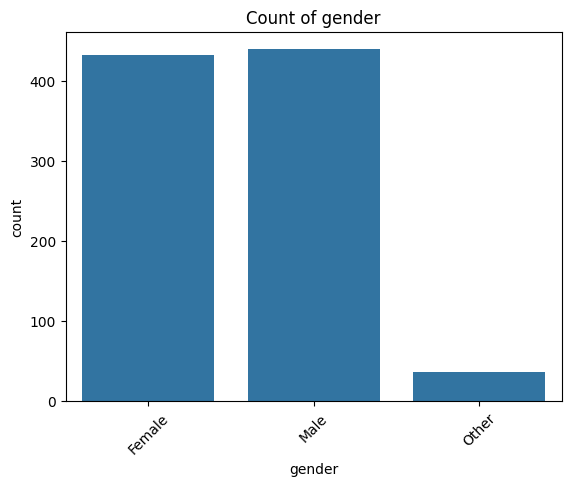

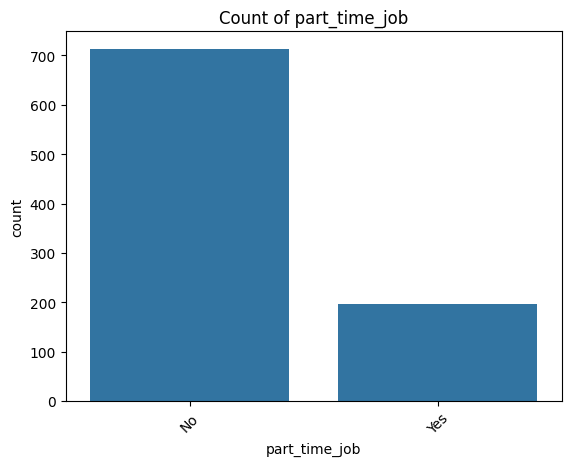

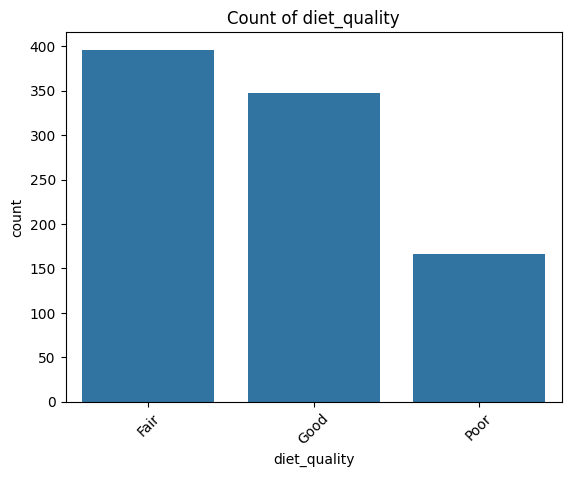

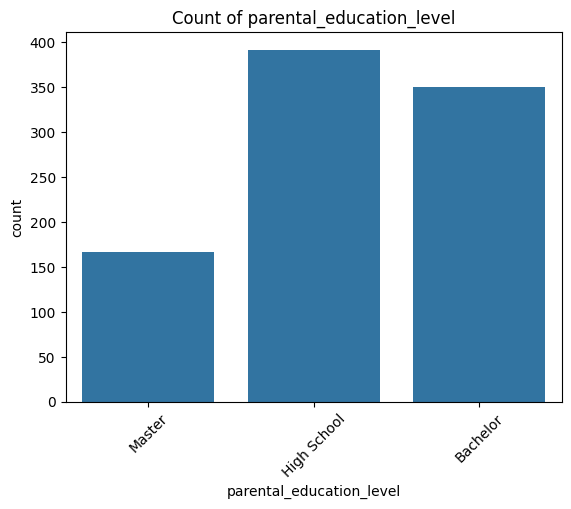

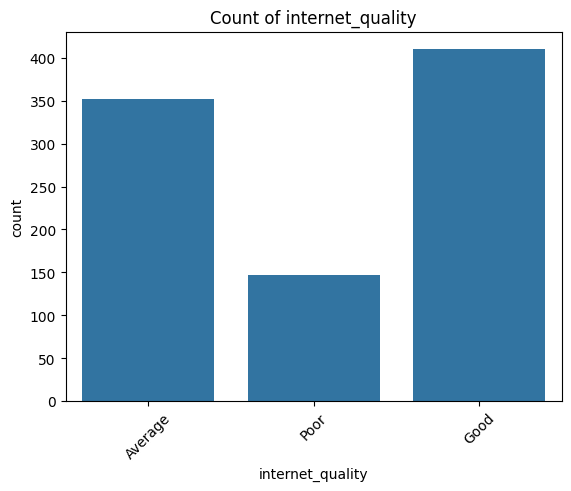

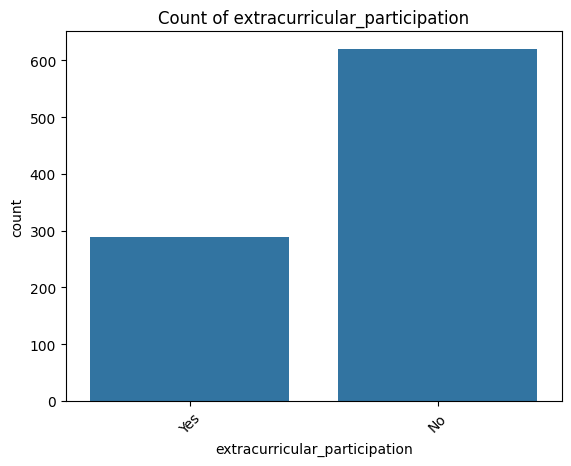

In [54]:
import seaborn as sns

for col in categorical_cols:
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

<Axes: >

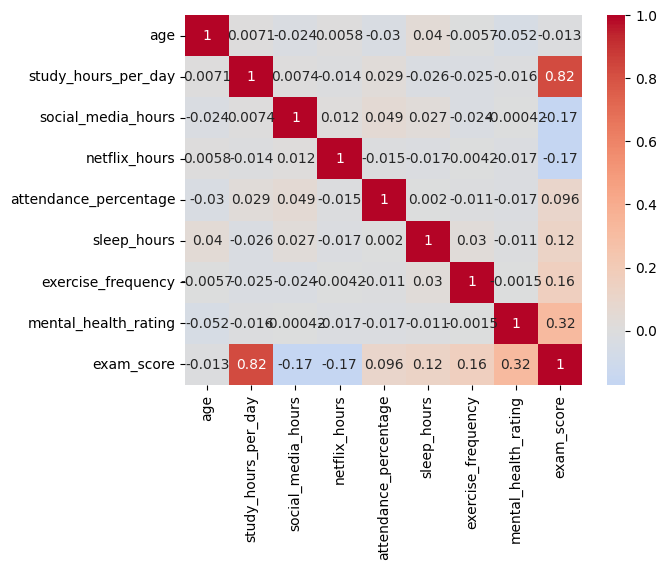

In [59]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0)

In [61]:
num_featues = df.select_dtypes(include=['int64', 'float64']).columns.to_numpy()
num_featues

array(['age', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'attendance_percentage', 'sleep_hours',
       'exercise_frequency', 'mental_health_rating', 'exam_score'],
      dtype=object)

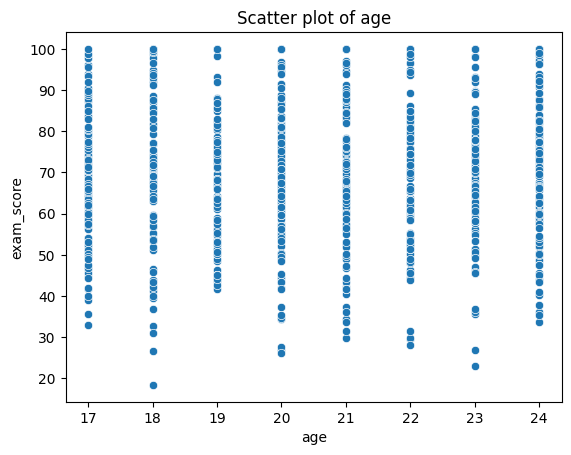

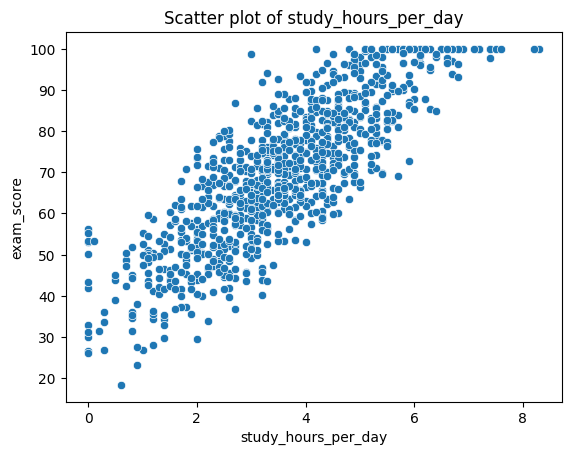

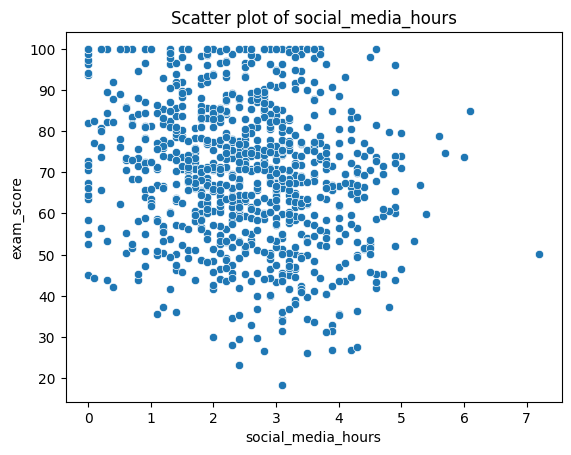

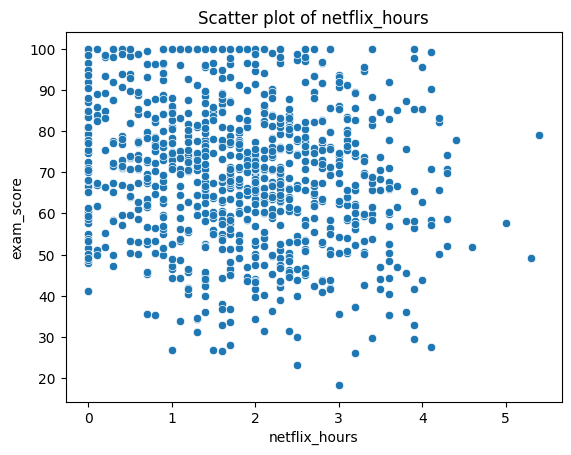

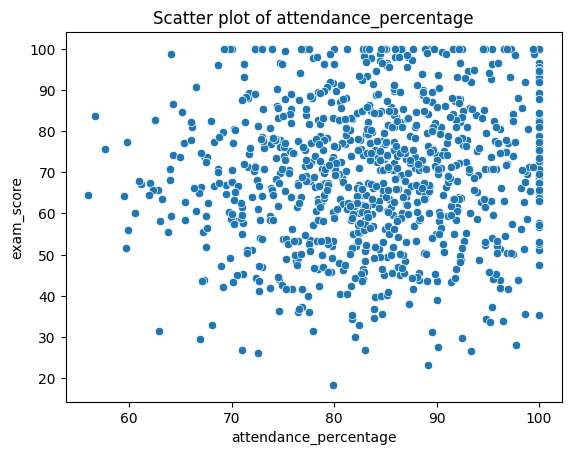

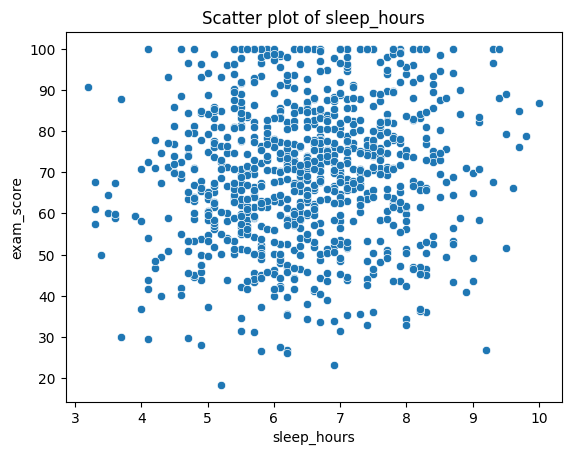

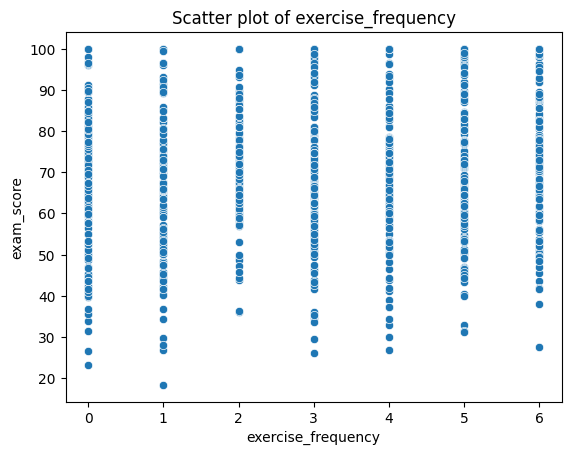

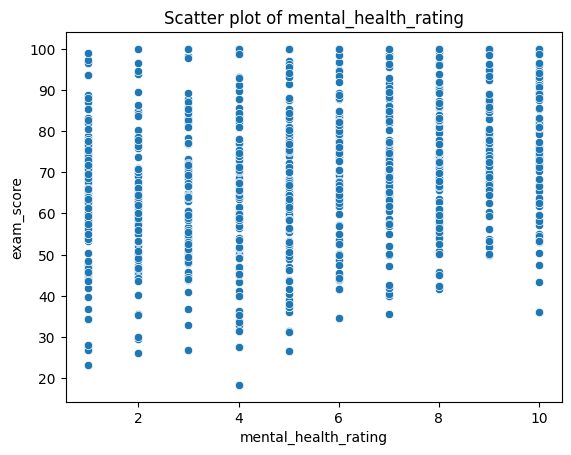

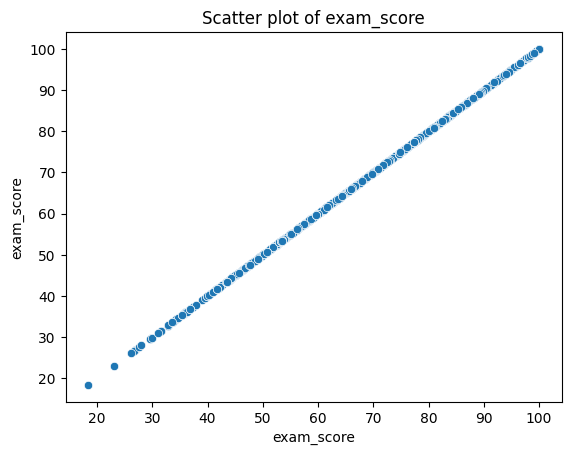

In [63]:
for feature in num_featues:
    sns.scatterplot(data=df, x=feature, y='exam_score')
    plt.title(f'Scatter plot of {feature}')
    plt.show()

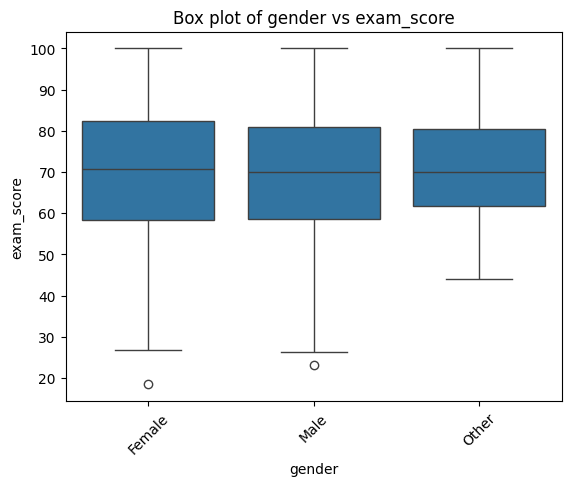

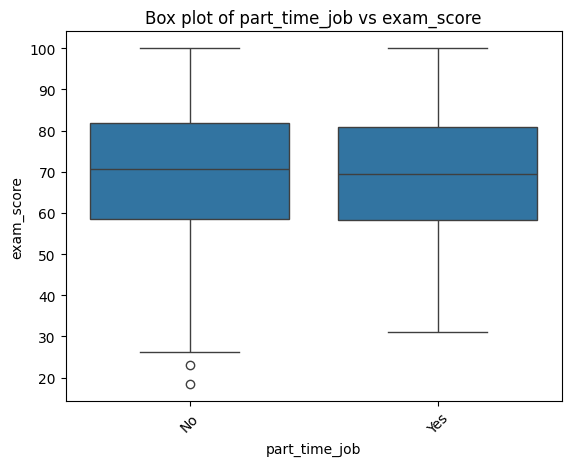

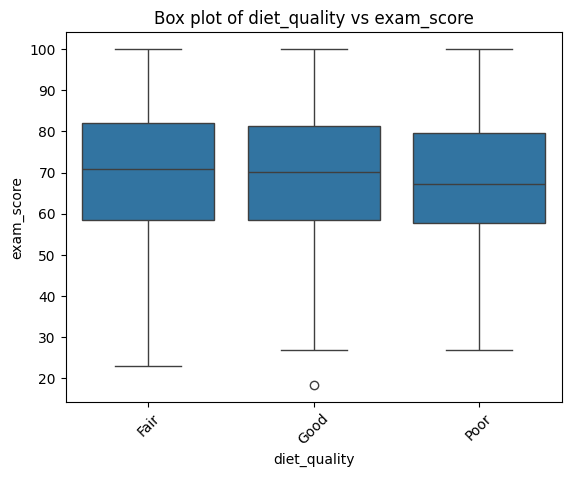

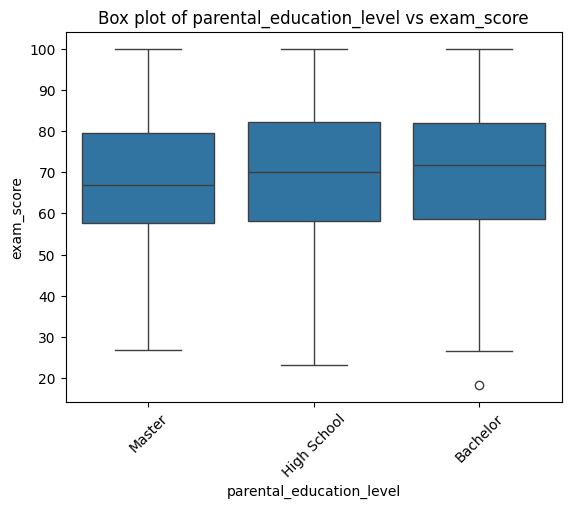

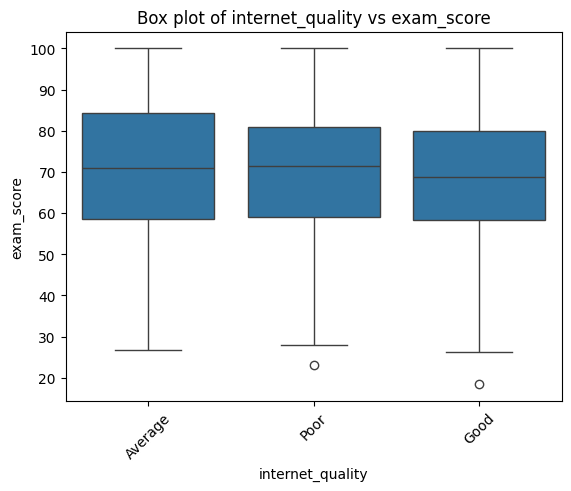

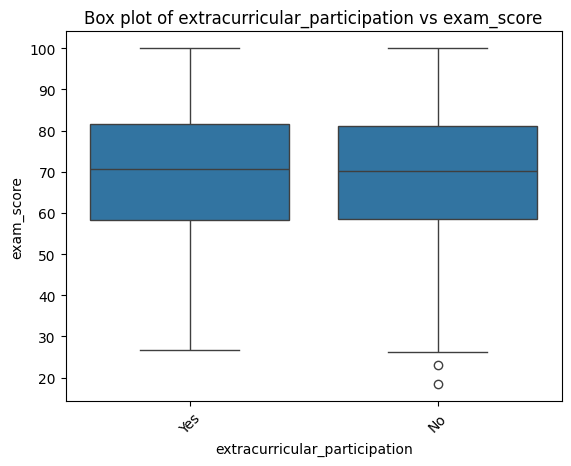

In [64]:
for col in categorical_cols:
    sns.boxplot(data=df, x=col, y='exam_score')
    plt.title(f'Box plot of {col} vs exam_score')
    plt.xticks(rotation=45)
    plt.show()

In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge

In [66]:
df.columns

Index(['age', 'gender', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'part_time_job', 'attendance_percentage',
       'sleep_hours', 'diet_quality', 'exercise_frequency',
       'parental_education_level', 'internet_quality', 'mental_health_rating',
       'extracurricular_participation', 'exam_score'],
      dtype='object')

In [85]:
df.head(5)

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [84]:
features = ["study_hours_per_day", "attendance_percentage", "mental_health_rating", "sleep_hours", "part_time_job"]

['study_hours_per_day',
 'attendance_percentage',
 'mental_health_rating',
 'sleep_hours',
 'part_time_job']

In [69]:
target = "exam_score"

In [104]:
model = df[features + [target]].copy()

In [105]:
model

,study_hours_per_day,attendance_percentage,mental_health_rating,sleep_hours,part_time_job,exam_score
0,0.0,85.0,8,8.0,No,56.2
1,6.9,97.3,8,4.6,No,100.0
2,1.4,94.8,1,8.0,No,34.3
3,1.0,71.0,1,9.2,No,26.8
4,5.0,90.9,1,4.9,No,66.4
...,...,...,...,...,...,...
995,2.6,77.0,6,7.5,No,76.1
996,2.9,86.0,6,6.8,Yes,65.9
997,3.0,61.9,9,6.5,No,64.4
998,5.4,100.0,1,7.6,Yes,69.7


In [106]:
le = LabelEncoder()

In [107]:
model['part_time_job'] = le.fit_transform(model['part_time_job'])

In [108]:
model

,study_hours_per_day,attendance_percentage,mental_health_rating,sleep_hours,part_time_job,exam_score
0,0.0,85.0,8,8.0,0,56.2
1,6.9,97.3,8,4.6,0,100.0
2,1.4,94.8,1,8.0,0,34.3
3,1.0,71.0,1,9.2,0,26.8
4,5.0,90.9,1,4.9,0,66.4
...,...,...,...,...,...,...
995,2.6,77.0,6,7.5,0,76.1
996,2.9,86.0,6,6.8,1,65.9
997,3.0,61.9,9,6.5,0,64.4
998,5.4,100.0,1,7.6,1,69.7


In [112]:
X, y = model[features], model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
models = {
    'Decision Tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [None, 5, 10, 15],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Random Forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5]
        },
    },
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    },
}

In [111]:
best_models = []

In [116]:
from sklearn.metrics import root_mean_squared_error

In [118]:
for name, config in models.items():
    print(f"Training {name}...")
    model = config['model']
    params = config['params']
    
    if params:
        grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        print(f"Best parameters for {name}: {grid_search.best_params_}")
    else:
        best_model = model.fit(X_train, y_train)
        
    y_pred = best_model.predict(X_test)
        
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
        
    best_models.append({
        "model": model,
        "best_params": grid_search.best_params_ if params else {},
        "rmse": rmse,
        "r2": r2
    })
    


Training Decision Tree...
Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 10}
Training Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Training Linear Regression...


In [120]:
result = pd.DataFrame(best_models, index=models.keys())

In [121]:
result.sort_values(by='rmse', inplace=True)

In [122]:
result

,model,best_params,rmse,r2
Random Forest,RandomForestRegressor(),"{'max_depth': 10, 'min_samples_split': 5, 'n_e...",7.104017,0.814072
Linear Regression,LinearRegression(),{},7.190938,0.809494
Decision Tree,DecisionTreeRegressor(),"{'max_depth': 5, 'min_samples_split': 10}",7.989826,0.764814
